<a href="https://colab.research.google.com/github/cyam04/Pwc-Digital-intelligence-/blob/main/Task%203%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The fair value estimate for the portfolio is 434848145.0 Swiss Francs


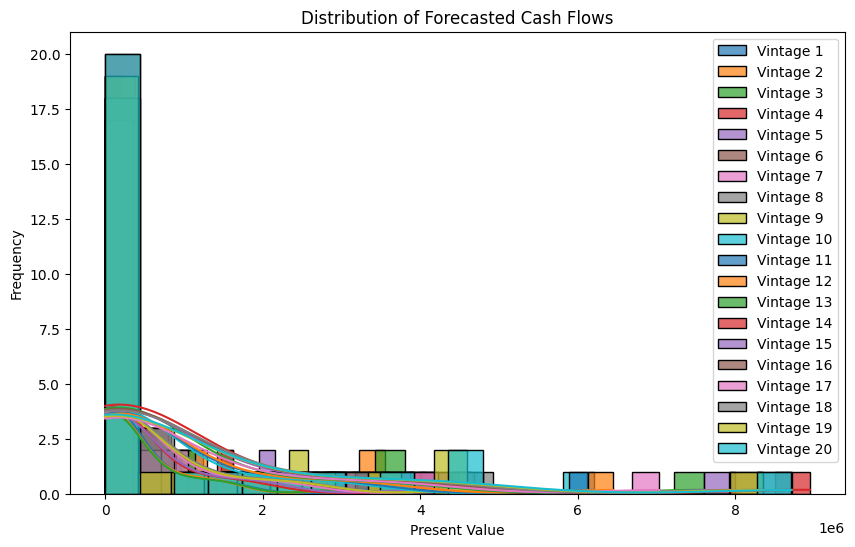

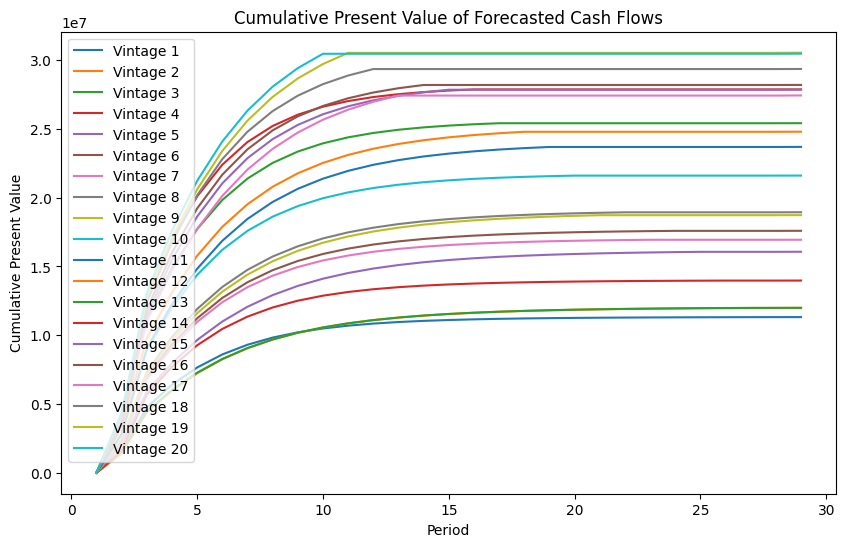

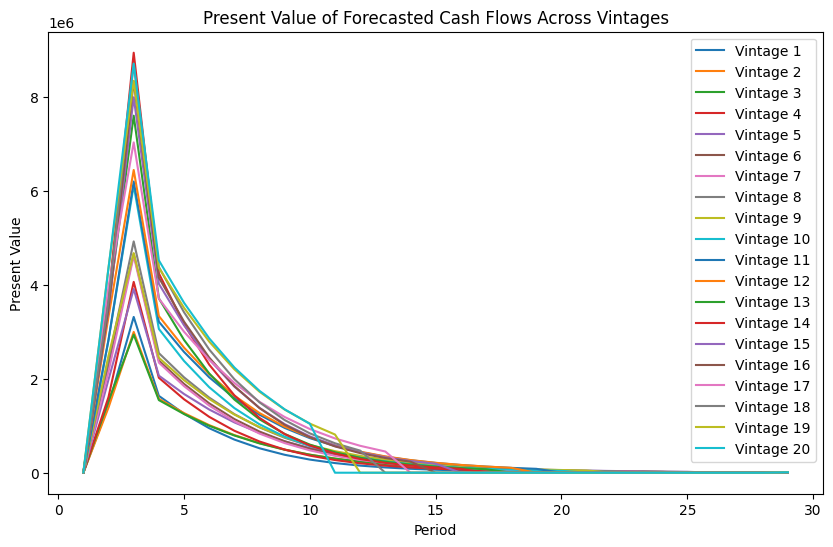

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from a CSV file
data = pd.read_csv("Data.csv", sep=";")

# Define the number of forecast periods
n_forecast = 30

# Determine the number of vintages
n_vintage = data.shape[0]

# Define the discount rate (annual)
discount_rate = 0.025

# Extract historical cash flows
historical_cf = data.iloc[:, 2:].values

# Extract vector of amounts originated per vintage
amount_originated = data.iloc[:, 1].values

# Calculate the number of periods to be forecasted per vintage
periods_remaining = n_forecast - np.arange(n_vintage)

# Calculate repayment percentage, i.e., historical payments as a percentage of the originated amount per vintage
paid_percentages = historical_cf / amount_originated[:, np.newaxis]

# Repayment percentage in the period that the loans were originated per vintage
first_period = np.diag(paid_percentages)

# Repayment percentage in the period after the loans were originated per vintage
second_period = np.append(np.diag(paid_percentages[:, 1:]), paid_percentages[-1, -1] * 2)

# (Assume the second cash flow is twice the first cash flow for the last vintage)

p = np.zeros((n_vintage, n_forecast))  # Matrix of zeros
p[:, 0] = first_period  # Assign repayment percentage of the first period
p[:, 1] = second_period  # Assign repayment percentage of the second period

# Calculate the expected repayment percentages
for i in range(n_vintage):
    for j in range(2, n_forecast):
        p[i, j] = max(0, p[i, 1] * np.log(1 + (1 - np.sum(p[i, 1:j]))) * (1 - (j-1) / n_forecast))

# Matrix of zeros for the forecasted expected repayment percentages
p_forecast = np.zeros((n_vintage, n_forecast - 1))

# Assign the expected repayment percentages to the correct periods
for i in range(n_vintage):
    for j in range(2, n_forecast):
        p[i, j] = max(0, p[i, 1] * np.log(1 + (1 - np.sum(p[i, 1:j]))) * (1 - (j-1) / n_forecast))

# Matrix of zeros for the forecasted expected repayment percentages
p_forecast = np.zeros((n_vintage, n_forecast - 1))

# Assign the expected repayment percentages to the correct periods
for i in range(n_vintage):
    for j in range(min(periods_remaining[i], n_forecast)):
        p_forecast[i, j-1] = p[i, j-2]

# Series of discount factors
discount_factors = 1 / (1 + discount_rate) ** (np.arange(n_forecast - 1) / 12)

# Present value of forecasted cash flows
pv = np.transpose(p_forecast) * discount_factors[:, np.newaxis] * amount_originated.reshape(1,-1)

# Sum of all present values, i.e., the value of the portfolio
result = np.sum(pv)

# Display the fair value estimate for the portfolio
print(f"The fair value estimate for the portfolio is {round(result, 2)} Swiss Francs")

# Additional Analysis:

# Plotting the distribution of forecasted cash flows
plt.figure(figsize=(10, 6))
for i in range(n_vintage):
    sns.histplot(pv[:, i], bins=20, kde=True, label=f"Vintage {i+1}", alpha=0.7)
plt.title("Distribution of Forecasted Cash Flows")
plt.xlabel("Present Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Calculating and visualizing the cumulative present value of forecasted cash flows over time
cumulative_pv = np.cumsum(pv, axis=0)
plt.figure(figsize=(10, 6))
for i in range(n_vintage):
    plt.plot(np.arange(1, n_forecast), cumulative_pv[:, i], label=f"Vintage {i+1}")
plt.title("Cumulative Present Value of Forecasted Cash Flows")
plt.xlabel("Period")
plt.ylabel("Cumulative Present Value")
plt.legend()
plt.show()

# Comparing the present value of forecasted cash flows across vintages
plt.figure(figsize=(10, 6))
for i in range(n_vintage):
    plt.plot(np.arange(1, n_forecast), pv[:, i], label=f"Vintage {i+1}")
plt.title("Present Value of Forecasted Cash Flows Across Vintages")
plt.xlabel("Period")
plt.ylabel("Present Value")
plt.legend()
plt.show()
